> ### Submitted by: Malaika Ahmed

# 🔴 ***Task 36 Implement with TensorFlow/Keras***
Learn how to create a CNN using TensorFlow and complete an image classification task.
***


***
## ***Downloading dataset directly from kaggle***


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:15<00:00, 134MB/s]
100% 1.06G/1.06G [00:15<00:00, 73.0MB/s]


***
## ***Unzipping the file***


In [4]:
import zipfile
z=zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
z.extractall("/content")
z.close()

***
## ***Importing Necessary Libraries***


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,AveragePooling2D,Flatten
from keras import Sequential

***
## ***Internally creating a generator that will:***

- Loads images from the specified directory.
- Processes them (e.g., resizing, normalizing).
- Converts them in batches, rather than loading the entire dataset into memory.


## ***Why Generators?***

The use of generators (image_dataset_from_directory acts as a generator) is crucial here. Generators allow the model to work with data in real-time, loading only the necessary batch of images into memory and then discarding them once processed, keeping memory usage low. This approach is especially important when dealing with large image datasets.

In [7]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train', # Path to the directory with training images
    labels="inferred",
    label_mode="int",      # Labels are returned as integers ( 0 will be assinged to cats and 1 to dogs)
    batch_size=32,         #  Size of the batches of data
    image_size=(256, 256), # Resizes images to 256x256 pixels

)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',  #  Path to the directory with validation images
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### In training data we have 2000 and in test data we have 5000 images
***

***
## ***Normalization:***
- Normalizing images by dividing all pixel values by 255.Pixel values in images ranges from 0 to 255, and dividing by 255 scales them to a range between 0 and 1.

-  By normalizing the images, the model can train more effectively since the input data is on a consistent scale. This helps in speeding up the convergence of the learning algorithm and can lead to better model performance.

## ***Creating Function to normalize images***

In [8]:

def process(image, label):

    image = tf.cast(image/255.,tf.float32)
    return image, label

# Applying the normalization function to each image in the training dataset
train_ds = train_ds.map(process)

# Apply the normalization function to each image in the validation dataset
validation_ds = validation_ds.map(process)

***
## ***Creating CNN MODEL***


In [9]:

model = Sequential()

# 1st convo layer with 32 filters and filter size 3,3
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))


# 2st convo layer with 64 filters and filter size 3,3
model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


# 3rd convo layer with 128+ filters and filter size 3,3
model.add(Conv2D(128, kernel_size=(3,3),padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

# Applying Flatten to convert 2D into 1D array
model.add(Flatten())
# Adding 3 fully Connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 76ms/step - accuracy: 0.5802 - loss: 0.6838 - val_accuracy: 0.7264 - val_loss: 0.5470
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.7481 - loss: 0.5109 - val_accuracy: 0.7926 - val_loss: 0.4570
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8064 - loss: 0.4185 - val_accuracy: 0.7756 - val_loss: 0.5238
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 73ms/step - accuracy: 0.8655 - loss: 0.3070 - val_accuracy: 0.7862 - val_loss: 0.6704
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 77ms/step - accuracy: 0.9296 - loss: 0.1746 - val_accuracy: 0.7700 - val_loss: 0.9859
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9583 - loss: 0.1060 - val_accuracy: 0.7704 - val_loss: 1.1298
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 72ms/step - accuracy: 0.9752 - loss: 0.0718 - val_accuracy: 0.7692 - val_loss: 1.1641
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9808 - loss: 0.0531 - 

***
## ***Vislualizing the accuracy score of train and test data***

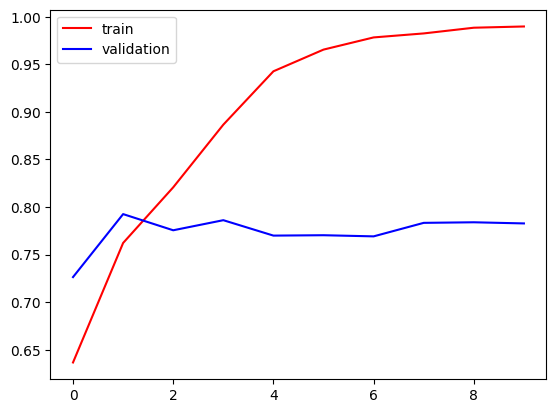

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color="red", label='train')
plt.plot(history.history['val_accuracy'], color="blue", label="validation")
plt.legend()
plt.show()

***INSIGHTS***

- With increase in epoches, training accuracy increases,however validation accuracy reduces.
- This shows model performs good on training data but not on test data

- Gap in training and test data accuracy shows that theirs overfitting in data
***

## ***Vislualizing the accuracy loss of train and test data***

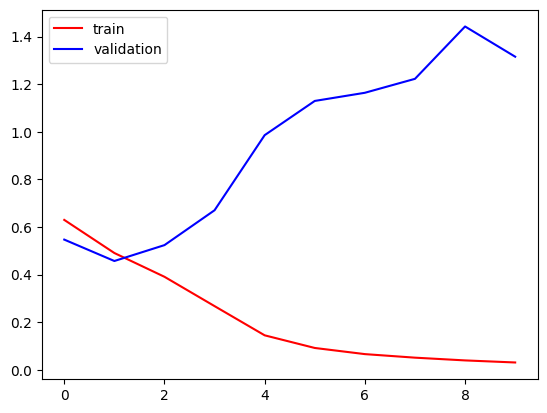

In [13]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'], color="blue", label='validation')
plt.legend()
plt.show()

***INSIGHTS***
- With increase in epoches,validation loss (shown with blue line) is increasing but training loss ( shown with red line) is decreasing.

- This overfitting can be reduced by
   - Adding more data
   - Data augumentation
   - Using L1/L2 regularization
   - Adding dropout layers
   - Adding batch normalization layer


***
# ***CHECKING MODEL ON NEW DATA***
***



In [14]:
import cv2
import matplotlib.pyplot as plt


### ***Checking on cat image***

In [15]:
test_img=cv2.imread('/content/test/cats/cat.10000.jpg')


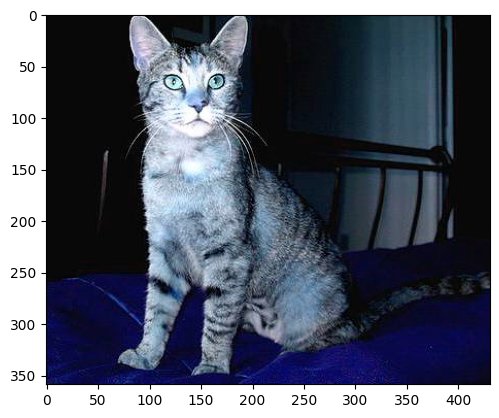

In [16]:
plt.imshow(test_img)


In [17]:
test_img.shape


(359, 431, 3)

In [18]:
Resize=cv2.resize(test_img,(256,256))

In [19]:
test_input=Resize.reshape((1,256,256,3))

In [20]:
test_input=Resize.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step


array([[0.]], dtype=float32)

## ***0 in output confirms that image is of cat. Our model correctly predicts the image***

***
### ***Checking on dog image***

In [22]:
test_img=cv2.imread('/content/test/dogs/dog.10014.jpg')



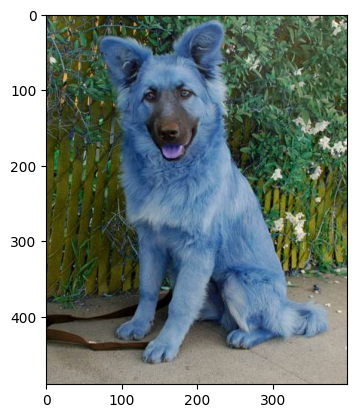

In [23]:
plt.imshow(test_img)


In [24]:
test_img.shape


(490, 399, 3)

In [25]:
Resize=cv2.resize(test_img,(256,256))



In [26]:
test_input=Resize.reshape((1,256,256,3))



In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

## ***1 in output confirms that image is of dog. Our model correctly predicts the image***
***
***